<a href="https://colab.research.google.com/github/Taghr66d/MSc-SummerProject2025/blob/main/CNN1_Week5_with_Accuracy_99_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X_cusp = np.load("/content/drive/MyDrive/Cusp Data/Cusp vs blip 5-20/X_cusp_10k(SNR5-20).npy")
y_cusp = np.load("/content/drive/MyDrive/Cusp Data/Cusp vs blip 5-20/y_cusp_10k(SNR5-20).npy")

X_blip = np.load("/content/drive/MyDrive/Cusp Data/Cusp vs blip 5-20/X_glitch_10k(SNR5-20).npy")
y_blip = np.load("/content/drive/MyDrive/Cusp Data/Cusp vs blip 5-20/y_glitch_10k(SNR5-20).npy")

# Combine and relabel (blip = 0, cusp = 1)
X = np.concatenate([X_blip, X_cusp], axis=0)
y = np.concatenate([np.zeros_like(y_blip), np.ones_like(y_cusp)], axis=0)

# Reshape for CNN input
X = X[..., np.newaxis]  # shape = (samples, 1024, 1)


In [20]:
print (X.shape)
print (y.shape)

(20000, 1024, 1)
(20000,)


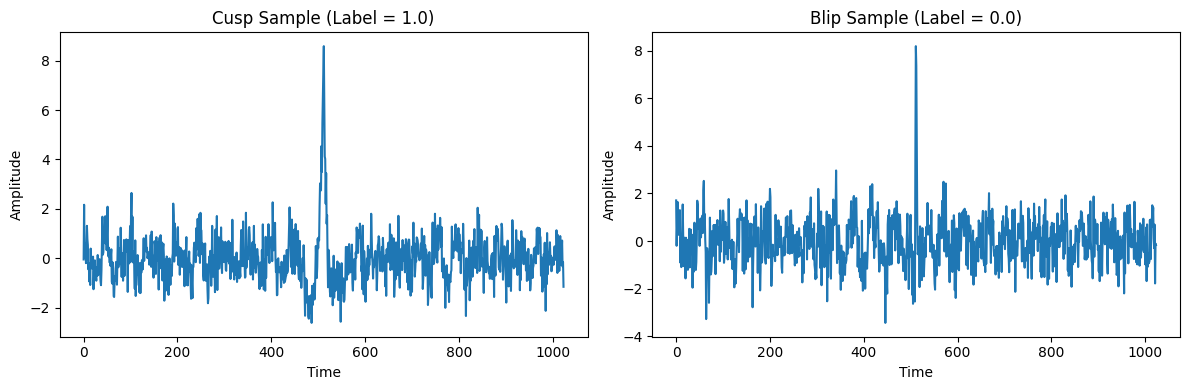

In [39]:
plt.figure(figsize=(12, 4))

# Plot a cusp
plt.subplot(1, 2, 1)
plt.plot(X_cusp[0])
plt.title(f"Cusp Sample (Label = {y_cusp[0]})")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# Plot a blip
plt.subplot(1, 2, 2)
plt.plot(X_blip[15])
plt.title(f"Blip Sample (Label = {y_blip[15]})")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

def split_data(X, y, val_size=0.15, test_size=0.15):
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    val_ratio = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_ratio, stratify=y_temp, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y, val_size=0.15, test_size=0.15)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(32, 7, activation='relu', input_shape=X.shape[1:]),
    BatchNormalization(),
    MaxPooling1D(2),

    Conv1D(64, 5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(2),

    GlobalAveragePooling1D(),

    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 1018, 32)       │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1018, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 509, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 505, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 505, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 252, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,169 (59.25 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 192 (768.00 B)

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 40s 165ms/step - accuracy: 0.8654 - loss: 0.3710 - val_accuracy: 0.5000 - val_loss: 0.5490
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.9927 - loss: 0.0320 - val_accuracy: 0.9587 - val_loss: 0.1266
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 42s 168ms/step - accuracy: 0.9968 - loss: 0.0132 - val_accuracy: 0.9993 - val_loss: 0.0069
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.9986 - loss: 0.0070 - val_accuracy: 0.9987 - val_loss: 0.0065
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 40s 165ms/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9930 - val_loss: 0.0151
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 40s 160ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 0.9990 - val_loss: 0.0042
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 37s 166ms/step - accuracy: 0.9988 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 40s 164ms/step - accuracy: 0.9998 - loss: 0

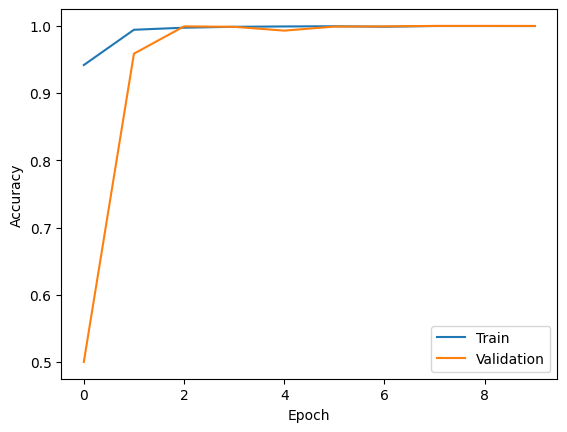

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

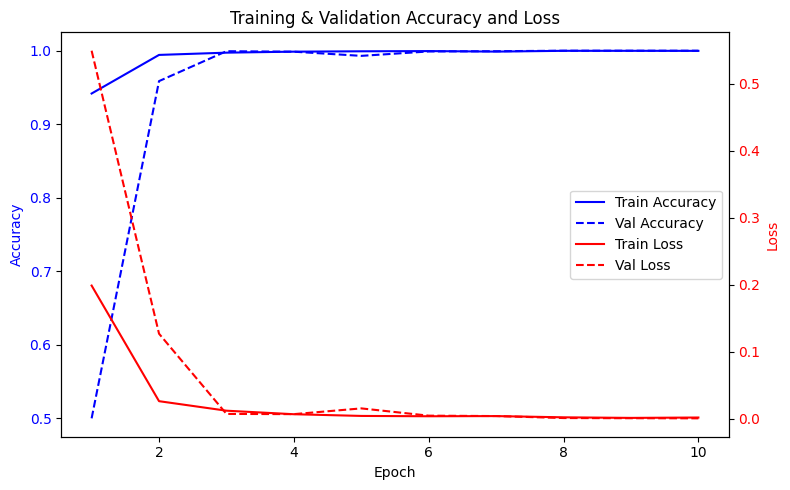

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

fig, ax1 = plt.subplots(figsize=(8, 5))


ax1.plot(epochs, history.history['accuracy'], 'b-', label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'], 'b--', label='Val Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')


ax2 = ax1.twinx()
ax2.plot(epochs, history.history['loss'], 'r-', label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], 'r--', label='Val Loss')
ax2.set_ylabel('Loss', color='r')
ax2.tick_params(axis='y', labelcolor='r')


lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center right')

plt.title('Training & Validation Accuracy and Loss')
plt.tight_layout()
plt.show()


In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 1.0000 - loss: 2.1461e-04
Test Accuracy: 0.9997, Test Loss: 0.0006


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step
Misclassified examples: 1


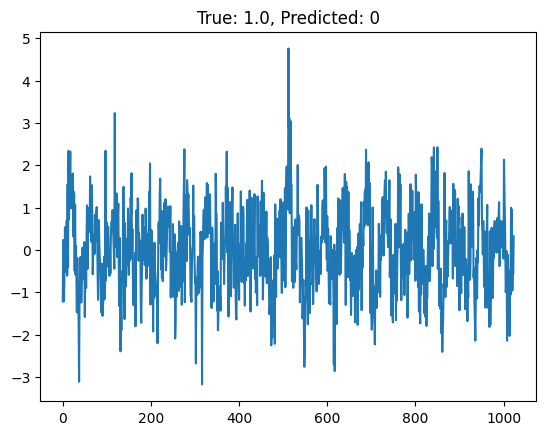

In [14]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
misclassified_idx = np.where(y_pred.flatten() != y_test)[0]

print(f"Misclassified examples: {len(misclassified_idx)}")


import matplotlib.pyplot as plt
for i in misclassified_idx[:5]:
    plt.plot(X_test[i].squeeze())
    plt.title(f"True: {y_test[i]}, Predicted: {y_pred[i][0]}")
    plt.show()


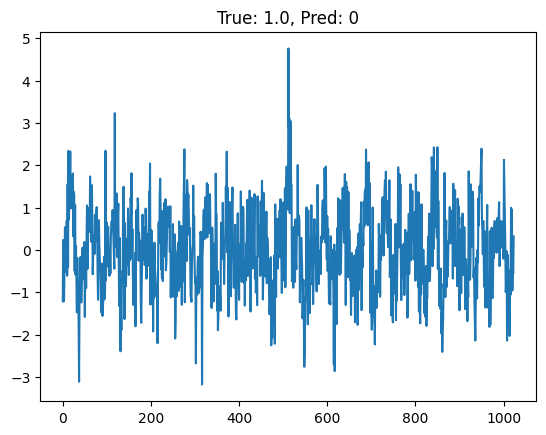

In [15]:
for i in misclassified_idx[:5]:
    plt.plot(X_test[i].squeeze())
    plt.title(f"True: {y_test[i]}, Pred: {y_pred[i][0]}")
    plt.show()


In [16]:
probs = model.predict(X_test)
for i in misclassified_idx[:5]:
    prob = probs[i][0]
    print(f"True: {y_test[i]}, Pred: {int(prob > 0.5)}, Confidence: {prob:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
True: 1.0, Pred: 0, Confidence: 0.2787


In [17]:
low_conf_idx = np.where((probs.flatten() > 0.3) & (probs.flatten() < 0.7))[0]
print(f"Low-confidence samples: {len(low_conf_idx)}")


Low-confidence samples: 0


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


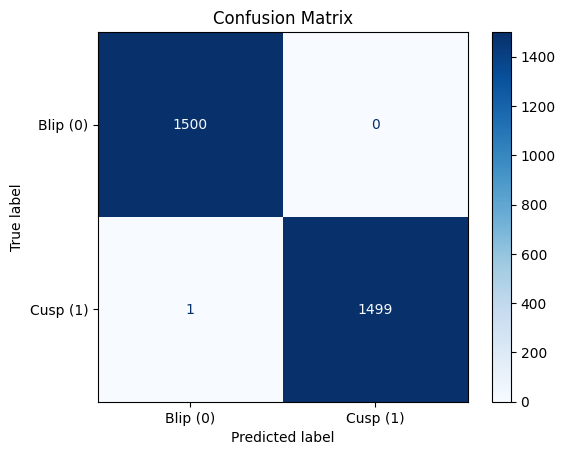

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

probs = model.predict(X_test)
y_pred = (probs > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Blip (0)", "Cusp (1)"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()
